In [190]:
import numpy as np
import pandas as pd
import boto3
import io

bucket_name = 'sagemaker-us-east-1-023375022819'
s3 = boto3.client('s3')
obj = s3.get_object(Bucket=bucket_name, Key='victor-kwak/df.csv')
data = pd.read_csv(io.BytesIO(obj['Body'].read())).set_index('ID')

In [191]:
weather = pd.read_csv('../../Data/weather.csv')
weather['DATE'] = pd.to_datetime(weather['DATE'])

In [192]:
pd.set_option('display.max_columns', 50)
weather_means = weather.groupby('DATE').mean().dropna(axis=1)
weather_means = weather_means.reset_index()

In [193]:
weather_means.columns = ['Date', 'AWND', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS',
       'WDF2', 'WDF5', 'WSF2', 'WSF5']

In [194]:
weather_means['Date'] = pd.to_datetime(weather_means['Date'])
weather_means.head()

Date       AWND    PGTM      PRCP      SNOW      SNWD  TMAX  TMIN  \
0 2017-01-01  4.770000   1284.0  0.000000  0.000000  0.000000  40.4  19.7   
1 2017-01-02  5.590000   1417.0  0.006923  0.000000  0.000000  40.3  25.6   
2 2017-01-03  9.470000   2189.5  0.159368  0.000000  0.000000  40.4  22.3   
3 2017-01-04  15.956667  346.0   0.046022  0.000000  0.000000  28.1  9.1    
4 2017-01-05  12.003333  1440.5  0.000330  0.005405  0.002778  15.8  4.8    

        TOBS        WDF2        WDF5       WSF2       WSF5  
0  26.571429  193.333333  183.333333  13.366667  17.733333  
1  35.000000  80.000000   80.000000   14.033333  17.666667  
2  30.714286  296.666667  276.666667  23.000000  30.366667  
3  10.142857  276.666667  283.333333  23.700000  32.733333  
4  6.857143   276.666667  273.333333  19.300000  23.900000

In [195]:
data.head()

Date                  Block         Primary Type  \
ID                                                                          
11207956  2018-01-18 09:35:00  076XX S VINCENNES AVE  BATTERY               
11236178  2018-02-21 00:40:00  037XX W ADDISON ST     BATTERY               
11236225  2018-02-21 06:00:00  012XX W MADISON ST     MOTOR VEHICLE THEFT   
11236335  2018-02-21 08:00:00  072XX S ROCKWELL ST    THEFT                 
11236443  2018-02-21 06:30:00  019XX S ST LOUIS AVE   BATTERY               

         Location Description  Beat  District  Ward  Community Area  \
ID                                                                    
11207956  STREET               623   6.0       17.0  69.0             
11236178  STREET               1732  17.0      30.0  16.0             
11236225  STREET               1224  12.0      27.0  28.0             
11236335  STREET               831   8.0       18.0  66.0             
11236443  APARTMENT            1024  10.0      24.0  29.0             

           Latitude  Longitude BlockID  cluster  hour  month  
ID                                                            
11207956  41.756092 -87.632341  076XX   2        9     1      
11236178  41.946464 -87.720672  037XX   3        0     2      
11236225  41.881601 -87.657991  012XX   0        6     2      
11236335  41.762338 -87.688075  072XX   5        8     2      
11236443  41.854515 -87.712418  019XX   4        6     2

In [196]:
data['Date'] = pd.to_datetime(data['Date'])

In [197]:
data.isna().sum()

Date                    0
Block                   0
Primary Type            0
Location Description    3
Beat                    0
District                1
Ward                    1
Community Area          0
Latitude                0
Longitude               0
BlockID                 0
cluster                 0
hour                    0
month                   0
dtype: int64

In [198]:
data['Location Description'] = data['Location Description'].fillna('None')

In [199]:
data.head()

Date                  Block         Primary Type  \
ID                                                                         
11207956 2018-01-18 09:35:00  076XX S VINCENNES AVE  BATTERY               
11236178 2018-02-21 00:40:00  037XX W ADDISON ST     BATTERY               
11236225 2018-02-21 06:00:00  012XX W MADISON ST     MOTOR VEHICLE THEFT   
11236335 2018-02-21 08:00:00  072XX S ROCKWELL ST    THEFT                 
11236443 2018-02-21 06:30:00  019XX S ST LOUIS AVE   BATTERY               

         Location Description  Beat  District  Ward  Community Area  \
ID                                                                    
11207956  STREET               623   6.0       17.0  69.0             
11236178  STREET               1732  17.0      30.0  16.0             
11236225  STREET               1224  12.0      27.0  28.0             
11236335  STREET               831   8.0       18.0  66.0             
11236443  APARTMENT            1024  10.0      24.0  29.0             

           Latitude  Longitude BlockID  cluster  hour  month  
ID                                                            
11207956  41.756092 -87.632341  076XX   2        9     1      
11236178  41.946464 -87.720672  037XX   3        0     2      
11236225  41.881601 -87.657991  012XX   0        6     2      
11236335  41.762338 -87.688075  072XX   5        8     2      
11236443  41.854515 -87.712418  019XX   4        6     2

In [200]:
data = data.dropna()
data['District'] = data['District'].astype(int)
data['Ward'] = data['Ward'].astype(int)
data['Community Area'] = data['Community Area'].astype(int)

In [201]:
data.head()

Date                  Block         Primary Type  \
ID                                                                         
11207956 2018-01-18 09:35:00  076XX S VINCENNES AVE  BATTERY               
11236178 2018-02-21 00:40:00  037XX W ADDISON ST     BATTERY               
11236225 2018-02-21 06:00:00  012XX W MADISON ST     MOTOR VEHICLE THEFT   
11236335 2018-02-21 08:00:00  072XX S ROCKWELL ST    THEFT                 
11236443 2018-02-21 06:30:00  019XX S ST LOUIS AVE   BATTERY               

         Location Description  Beat  District  Ward  Community Area  \
ID                                                                    
11207956  STREET               623   6         17    69               
11236178  STREET               1732  17        30    16               
11236225  STREET               1224  12        27    28               
11236335  STREET               831   8         18    66               
11236443  APARTMENT            1024  10        24    29               

           Latitude  Longitude BlockID  cluster  hour  month  
ID                                                            
11207956  41.756092 -87.632341  076XX   2        9     1      
11236178  41.946464 -87.720672  037XX   3        0     2      
11236225  41.881601 -87.657991  012XX   0        6     2      
11236335  41.762338 -87.688075  072XX   5        8     2      
11236443  41.854515 -87.712418  019XX   4        6     2

In [202]:
data.shape

(282396, 14)

In [203]:
data['Date'] = data['Date'].dt.date
data.head()

Date                  Block         Primary Type  \
ID                                                                 
11207956  2018-01-18  076XX S VINCENNES AVE  BATTERY               
11236178  2018-02-21  037XX W ADDISON ST     BATTERY               
11236225  2018-02-21  012XX W MADISON ST     MOTOR VEHICLE THEFT   
11236335  2018-02-21  072XX S ROCKWELL ST    THEFT                 
11236443  2018-02-21  019XX S ST LOUIS AVE   BATTERY               

         Location Description  Beat  District  Ward  Community Area  \
ID                                                                    
11207956  STREET               623   6         17    69               
11236178  STREET               1732  17        30    16               
11236225  STREET               1224  12        27    28               
11236335  STREET               831   8         18    66               
11236443  APARTMENT            1024  10        24    29               

           Latitude  Longitude BlockID  cluster  hour  month  
ID                                                            
11207956  41.756092 -87.632341  076XX   2        9     1      
11236178  41.946464 -87.720672  037XX   3        0     2      
11236225  41.881601 -87.657991  012XX   0        6     2      
11236335  41.762338 -87.688075  072XX   5        8     2      
11236443  41.854515 -87.712418  019XX   4        6     2

In [204]:
weather_means[weather_means['Date'] > '01/01/2017'].head()

Date       AWND    PGTM      PRCP      SNOW      SNWD  TMAX  TMIN  \
1 2017-01-02  5.590000   1417.0  0.006923  0.000000  0.000000  40.3  25.6   
2 2017-01-03  9.470000   2189.5  0.159368  0.000000  0.000000  40.4  22.3   
3 2017-01-04  15.956667  346.0   0.046022  0.000000  0.000000  28.1  9.1    
4 2017-01-05  12.003333  1440.5  0.000330  0.005405  0.002778  15.8  4.8    
5 2017-01-06  9.246667   1231.0  0.000000  0.000000  0.000000  10.8  0.2    

        TOBS        WDF2        WDF5       WSF2       WSF5  
1  35.000000  80.000000   80.000000   14.033333  17.666667  
2  30.714286  296.666667  276.666667  23.000000  30.366667  
3  10.142857  276.666667  283.333333  23.700000  32.733333  
4  6.857143   276.666667  273.333333  19.300000  23.900000  
5  1.285714   273.333333  266.666667  15.433333  18.333333

In [206]:
weather_means['Date'] = weather_means['Date'].dt.date

In [207]:
merged = pd.merge(data,weather_means, on='Date', how='left')
merged['Date'] = pd.to_datetime(merged['Date'])

In [284]:
test = merged[merged['Date'] >= '01/01/2019']
train = merged[merged['Date'] < '01/01/2019']

pd.set_option('display.max_columns', 10)
train.head()

Date                  Block         Primary Type Location Description  \
0 2018-01-18  076XX S VINCENNES AVE  BATTERY              STREET                
1 2018-02-21  037XX W ADDISON ST     BATTERY              STREET                
2 2018-02-21  012XX W MADISON ST     MOTOR VEHICLE THEFT  STREET                
3 2018-02-21  072XX S ROCKWELL ST    THEFT                STREET                
4 2018-02-21  019XX S ST LOUIS AVE   BATTERY              APARTMENT             

   Beat    ...           TOBS        WDF2        WDF5  WSF2       WSF5  
0  623     ...      20.857143  226.666667  243.333333  21.6  28.366667  
1  1732    ...      28.857143  233.333333  233.333333  18.1  22.266667  
2  1224    ...      28.857143  233.333333  233.333333  18.1  22.266667  
3  831     ...      28.857143  233.333333  233.333333  18.1  22.266667  
4  1024    ...      28.857143  233.333333  233.333333  18.1  22.266667  

[5 rows x 26 columns]

In [209]:
weather_means.columns

Index(['Date', 'AWND', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS',
       'WDF2', 'WDF5', 'WSF2', 'WSF5'],
      dtype='object')

In [210]:
X_cols = ['Location Description', 'Beat','District', 'Ward', 'Community Area', 'BlockID', 'cluster', 'hour', 'month', 'AWND', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS',
       'WDF2', 'WDF5', 'WSF2', 'WSF5']
y_cols = 'Primary Type'

X_train = train[X_cols]
X_test = test[X_cols]
y_train = train[y_cols]
y_test = test[y_cols]

In [211]:
X_train.head()

Location Description  Beat  District  Ward  Community Area BlockID  cluster  \
0  STREET               623   6         17    69              076XX   2         
1  STREET               1732  17        30    16              037XX   3         
2  STREET               1224  12        27    28              012XX   0         
3  STREET               831   8         18    66              072XX   5         
4  APARTMENT            1024  10        24    29              019XX   4         

   hour  month       AWND    PGTM      PRCP      SNOW      SNWD  TMAX  TMIN  \
0  9     1      13.943333  533.0   0.000000  0.000000  2.815385  27.9  10.7   
1  0     2      10.886667  1271.5  1.146381  0.036364  0.000000  45.7  27.4   
2  6     2      10.886667  1271.5  1.146381  0.036364  0.000000  45.7  27.4   
3  8     2      10.886667  1271.5  1.146381  0.036364  0.000000  45.7  27.4   
4  6     2      10.886667  1271.5  1.146381  0.036364  0.000000  45.7  27.4   

        TOBS        WDF2        WDF5  WSF2       WSF5  
0  20.857143  226.666667  243.333333  21.6  28.366667  
1  28.857143  233.333333  233.333333  18.1  22.266667  
2  28.857143  233.333333  233.333333  18.1  22.266667  
3  28.857143  233.333333  233.333333  18.1  22.266667  
4  28.857143  233.333333  233.333333  18.1  22.266667

In [212]:
X_train.shape

(261509, 21)

In [213]:
from sklearn.preprocessing import LabelEncoder

loc_encoder = LabelEncoder()
X_train['Location Description'] = loc_encoder.fit_transform(X_train['Location Description'])

block_encoder = LabelEncoder()
X_train['BlockID'] = block_encoder.fit_transform(X_train['BlockID'])

y_encoder = LabelEncoder()
X_train['label'] = y_encoder.fit_transform(y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [214]:
train = X_train[['label','Location Description', 'Beat', 'District', 'Ward', 'Community Area', 'BlockID',
       'cluster', 'hour', 'month', 'AWND', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS',
       'WDF2', 'WDF5', 'WSF2', 'WSF5']]

In [215]:
X_test['Location Description'] = loc_encoder.transform(X_test['Location Description'])
X_test['BlockID'] = block_encoder.transform(X_test['BlockID'])
X_test['label'] = y_encoder.transform(y_test)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [216]:
test = X_test[['label','Location Description', 'Beat', 'District', 'Ward', 'Community Area', 'BlockID',
       'cluster', 'hour', 'month','AWND', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS',
       'WDF2', 'WDF5', 'WSF2', 'WSF5']]

In [217]:
train.head()

label  Location Description  Beat  District  Ward  Community Area  BlockID  \
0  0      125                   623   6         17    69              77        
1  0      125                   1732  17        30    16              38        
2  3      125                   1224  12        27    28              13        
3  4      125                   831   8         18    66              73        
4  0      17                    1024  10        24    29              20        

   cluster  hour  month       AWND    PGTM      PRCP      SNOW      SNWD  \
0  2        9     1      13.943333  533.0   0.000000  0.000000  2.815385   
1  3        0     2      10.886667  1271.5  1.146381  0.036364  0.000000   
2  0        6     2      10.886667  1271.5  1.146381  0.036364  0.000000   
3  5        8     2      10.886667  1271.5  1.146381  0.036364  0.000000   
4  4        6     2      10.886667  1271.5  1.146381  0.036364  0.000000   

   TMAX  TMIN       TOBS        WDF2        WDF5  WSF2       WSF5  
0  27.9  10.7  20.857143  226.666667  243.333333  21.6  28.366667  
1  45.7  27.4  28.857143  233.333333  233.333333  18.1  22.266667  
2  45.7  27.4  28.857143  233.333333  233.333333  18.1  22.266667  
3  45.7  27.4  28.857143  233.333333  233.333333  18.1  22.266667  
4  45.7  27.4  28.857143  233.333333  233.333333  18.1  22.266667

In [218]:
test.head()

label  Location Description  Beat  District  Ward  Community Area  \
65097  4      61                    1433  14        1     24               
65100  4      17                    1935  19        43    7                
66201  4      107                   1122  11        28    26               
66465  4      107                   214   2         4     36               
66466  4      108                   1211  12        26    24               

       BlockID  cluster  hour  month       AWND    PGTM      PRCP     SNOW  \
65097  14       0        17    1      7.680000   573.0   0.719412  0.03871   
65100  8        10       15    1      14.763333  1675.5  0.298866  0.00000   
66201  40       4        12    1      5.370000   1818.0  0.000000  0.00000   
66465  9        19       12    1      4.770000   12.5    0.000000  0.00000   
66466  11       9        12    1      8.576667   1133.5  0.000444  0.00000   

           SNWD       TMAX  TMIN       TOBS        WDF2        WDF5  \
65097  0.006122  36.700000  27.9  29.000000  126.666667  240.000000   
65100  0.000000  49.500000  28.7  33.428571  280.000000  273.333333   
66201  1.580000  35.400000  28.0  31.000000  303.333333  283.333333   
66465  0.000000  24.666667  14.4  18.428571  330.000000  326.666667   
66466  2.006122  34.600000  27.3  30.142857  36.666667   40.000000    

            WSF2       WSF5  
65097  15.433333  21.600000  
65100  33.033333  47.733333  
66201  12.400000  15.733333  
66465  14.766667  19.300000  
66466  15.733333  20.266667

In [221]:
import boto3
from io import StringIO

csv_buffer = StringIO()

train.to_csv(csv_buffer, index=False, header=False)
s3_resource = boto3.resource('s3')
s3_resource.Object('vkwak', 'train.csv').put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': '61A27B15A7D3C58A',
  'HostId': 'Bwyq/hRCmVmcl92x8Dok1GuWSG2YOOcDrTqL8gnQwDMV9e6g516X1Ypx8xyqfcY4jUtDYCQ6z00=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'Bwyq/hRCmVmcl92x8Dok1GuWSG2YOOcDrTqL8gnQwDMV9e6g516X1Ypx8xyqfcY4jUtDYCQ6z00=',
   'x-amz-request-id': '61A27B15A7D3C58A',
   'date': 'Thu, 21 Mar 2019 18:37:16 GMT',
   'etag': '"fc4ade4c0a5149fc537c98d38baf4e27"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"fc4ade4c0a5149fc537c98d38baf4e27"'}

# Model Building

In [222]:
y_train.unique()

array(['BATTERY', 'MOTOR VEHICLE THEFT', 'THEFT', 'WEAPONS VIOLATION',
       'HOMICIDE', 'KIDNAPPING'], dtype=object)

In [223]:
import sagemaker
from sagemaker.amazon.amazon_estimator import get_image_uri

sess = sagemaker.Session()

bucket='vkwak'
prefix = 'sagemaker/vkwak-xgboost-classif'

region = boto3.Session().region_name    
smclient = boto3.Session().client('sagemaker')
role = sagemaker.get_execution_role()

container = get_image_uri(region, 'xgboost', repo_version='latest')

xgb = sagemaker.estimator.Estimator(container,
                                    role, 
                                    train_instance_count=1, 
                                    train_instance_type='ml.m5.xlarge',
                                    output_path='s3://{}/{}/output'.format(bucket, prefix),
                                    sagemaker_session=sess)

xgb.set_hyperparameters(eval_metric='merror',
                        num_class=6,
                        objective='multi:softmax',
                        num_round=100,
                        rate_drop=0.3,
                        tweedie_variance_power=1.4)

In [224]:
from sagemaker.tuner import IntegerParameter, CategoricalParameter, \
                            ContinuousParameter, HyperparameterTuner


hyperparameter_ranges = {'eta': ContinuousParameter(0, 1),
                        'min_child_weight': ContinuousParameter(1, 10),
                        'alpha': ContinuousParameter(0, 2),
                        'max_depth': IntegerParameter(1, 10)}

In [225]:
objective_metric_name = 'validation:merror'

In [226]:
tuner = HyperparameterTuner(xgb,
                            objective_metric_name,
                            hyperparameter_ranges,
                            max_jobs=25,
                            objective_type='Minimize',
                            max_parallel_jobs=8)

In [227]:
s3_input_train = sagemaker.s3_input(s3_data='s3://{}/train.csv'.format(bucket), content_type='csv')
s3_input_validation = sagemaker.s3_input(s3_data='s3://{}/test.csv'.format(bucket), content_type='csv')

tuner.fit({'train': s3_input_train, 'validation': s3_input_validation}, include_cls_metadata=False)

INFO:sagemaker:Creating hyperparameter tuning job with name: xgboost-190321-1837


In [228]:
boto3.client('sagemaker').describe_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=tuner.latest_tuning_job.job_name)['HyperParameterTuningJobStatus']

'InProgress'

In [230]:
tuning_job_name = 'xgboost-190321-1837'

In [272]:
tuning_job_result = smclient.describe_hyper_parameter_tuning_job(HyperParameterTuningJobName=tuning_job_name)

status = tuning_job_result['HyperParameterTuningJobStatus']
if status != 'Completed':
    print('Reminder: the tuning job has not been completed.')
    
job_count = tuning_job_result['TrainingJobStatusCounters']['Completed']
print("%d training jobs have completed" % job_count)

is_minimize = (tuning_job_result['HyperParameterTuningJobConfig']['HyperParameterTuningJobObjective']['Type'] != 'Maximize')
objective_name = tuning_job_result['HyperParameterTuningJobConfig']['HyperParameterTuningJobObjective']['MetricName']

25 training jobs have completed


In [273]:
from pprint import pprint
if tuning_job_result.get('BestTrainingJob',None):
    print("Best model found so far:")
    pprint(tuning_job_result['BestTrainingJob'])
else:
    print("No training jobs have reported results yet.")

Best model found so far:
{'CreationTime': datetime.datetime(2019, 3, 21, 18, 48, 6, tzinfo=tzlocal()),
 'FinalHyperParameterTuningJobObjectiveMetric': {'MetricName': 'validation:merror',
                                                 'Value': 0.3288649916648865},
 'ObjectiveStatus': 'Succeeded',
 'TrainingEndTime': datetime.datetime(2019, 3, 21, 18, 53, 26, tzinfo=tzlocal()),
 'TrainingJobArn': 'arn:aws:sagemaker:us-east-1:023375022819:training-job/xgboost-190321-1837-023-8a788909',
 'TrainingJobName': 'xgboost-190321-1837-023-8a788909',
 'TrainingJobStatus': 'Completed',
 'TrainingStartTime': datetime.datetime(2019, 3, 21, 18, 50, 29, tzinfo=tzlocal()),
 'TunedHyperParameters': {'alpha': '1.7832984149816964',
                          'eta': '0.03328427410230465',
                          'max_depth': '10',
                          'min_child_weight': '5.557008749421809'}}


In [274]:
tuner = sagemaker.HyperparameterTuningJobAnalytics(tuning_job_name)

full_df = tuner.dataframe()

if len(full_df) > 0:
    df = full_df[full_df['FinalObjectiveValue'] > -float('inf')]
    if len(df) > 0:
        df = df.sort_values('FinalObjectiveValue', ascending=is_minimize)
        print("Number of training jobs with valid objective: %d" % len(df))
        print({"lowest":min(df['FinalObjectiveValue']),"highest": max(df['FinalObjectiveValue'])})
        pd.set_option('display.max_colwidth', -1)  # Don't truncate TrainingJobName        
    else:
        print("No training jobs have reported valid results yet.")
        
df.head()

Number of training jobs with valid objective: 25
{'lowest': 0.3288649916648865, 'highest': 0.35883599519729614}


FinalObjectiveValue  TrainingElapsedTimeSeconds           TrainingEndTime  \
2   0.328865             177.0                      2019-03-21 18:53:26+00:00   
21  0.329966             184.0                      2019-03-21 18:42:53+00:00   
20  0.330158             80.0                       2019-03-21 18:41:29+00:00   
3   0.330301             180.0                      2019-03-21 18:52:53+00:00   
24  0.330397             70.0                       2019-03-21 18:41:23+00:00   

                     TrainingJobName TrainingJobStatus  \
2   xgboost-190321-1837-023-8a788909  Completed          
21  xgboost-190321-1837-004-a10f45b2  Completed          
20  xgboost-190321-1837-005-cac9b482  Completed          
3   xgboost-190321-1837-022-8cf1e460  Completed          
24  xgboost-190321-1837-001-dce0790d  Completed          

           TrainingStartTime     alpha       eta  max_depth  min_child_weight  
2  2019-03-21 18:50:29+00:00  1.783298  0.033284  10.0       5.557009          
21 2019-03-21 18:39:49+00:00  0.453762  0.044508  9.0        5.062904          
20 2019-03-21 18:40:09+00:00  1.456570  0.456719  3.0        8.424005          
3  2019-03-21 18:49:53+00:00  1.743298  0.023177  10.0       5.557009          
24 2019-03-21 18:40:13+00:00  1.661858  0.964914  2.0        5.543188

In [275]:
import bokeh
import bokeh.io
bokeh.io.output_notebook()
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

class HoverHelper():

    def __init__(self, tuning_analytics):
        self.tuner = tuning_analytics

    def hovertool(self):
        tooltips = [
            ("FinalObjectiveValue", "@FinalObjectiveValue"),
            ("TrainingJobName", "@TrainingJobName"),
        ]
        for k in self.tuner.tuning_ranges.keys():
            tooltips.append( (k, "@{%s}" % k) )

        ht = HoverTool(tooltips=tooltips)
        return ht

    def tools(self, standard_tools='pan,crosshair,wheel_zoom,zoom_in,zoom_out,undo,reset'):
        return [self.hovertool(), standard_tools]

hover = HoverHelper(tuner)

p = figure(plot_width=900, plot_height=400, tools=hover.tools(), x_axis_type='datetime')
p.circle(source=df, x='TrainingStartTime', y='FinalObjectiveValue')
show(p)

Loading BokehJS ...

In [276]:
ranges = tuner.tuning_ranges
figures = []
for hp_name, hp_range in ranges.items():
    categorical_args = {}
    if hp_range.get('Values'):
        # This is marked as categorical.  Check if all options are actually numbers.
        def is_num(x):
            try:
                float(x)
                return 1
            except:
                return 0           
        vals = hp_range['Values']
        if sum([is_num(x) for x in vals]) == len(vals):
            # Bokeh has issues plotting a "categorical" range that's actually numeric, so plot as numeric
            print("Hyperparameter %s is tuned as categorical, but all values are numeric" % hp_name)
        else:
            # Set up extra options for plotting categoricals.  A bit tricky when they're actually numbers.
            categorical_args['x_range'] = vals

    # Now plot it
    p = figure(plot_width=500, plot_height=500, 
               title="Objective vs %s" % hp_name,
               tools=hover.tools(),
               x_axis_label=hp_name, y_axis_label=objective_name,
               **categorical_args)
    p.circle(source=df, x=hp_name, y='FinalObjectiveValue')
    figures.append(p)
show(bokeh.layouts.Column(*figures))

In [277]:
from xgboost.sklearn import XGBClassifier

In [279]:
{'alpha': '1.7832984149816964',
                          'eta': '0.03328427410230465',
                          'max_depth': '10',
                          'min_child_weight': '5.557008749421809'}

xgb = XGBClassifier(max_depth=10, 
                    eta=0.03328427410230465, 
                    alpha=1.7832984149816964, 
                    min_child_weight=5.557008749421809,
                    n_jobs=-1)

In [280]:
xgb.fit(X_train.drop('label', axis=1), y_encoder.transform(y_train))

XGBClassifier(alpha=1.7832984149816964, base_score=0.5, booster='gbtree',
       colsample_bylevel=1, colsample_bytree=1, eta=0.03328427410230465,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=5.557008749421809, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [281]:
X_train.drop('label', axis=1).columns

Index(['Location Description', 'Beat', 'District', 'Ward', 'Community Area',
       'BlockID', 'cluster', 'hour', 'month', 'AWND', 'PGTM', 'PRCP', 'SNOW',
       'SNWD', 'TMAX', 'TMIN', 'TOBS', 'WDF2', 'WDF5', 'WSF2', 'WSF5'],
      dtype='object')

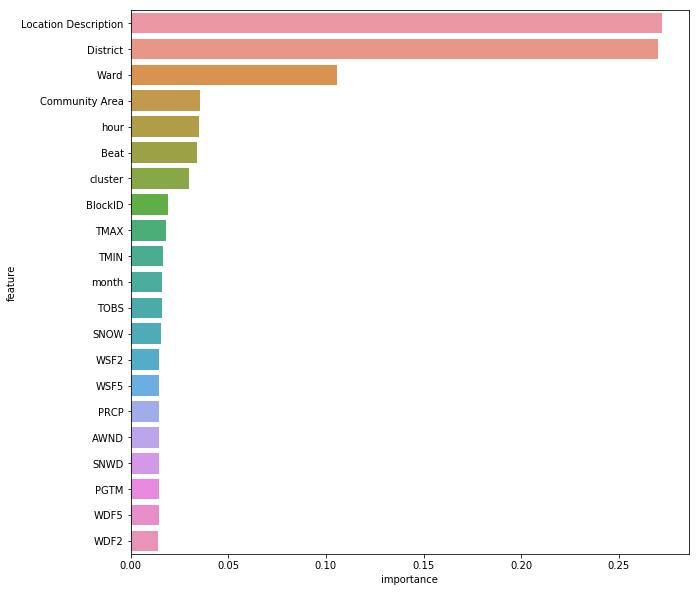

In [282]:
import matplotlib.pyplot as plt
import seaborn as sns


graph_data = pd.DataFrame.from_dict({'feature':X_train.drop('label', axis=1).columns,
                                     'importance': xgb.feature_importances_})

plt.figure(figsize=(10,10))
sns.barplot(y='feature', x='importance', data=graph_data.sort_values(by='importance', ascending=False))

In [287]:
preds = xgb.predict(X_test.drop('label', axis=1))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [295]:
from sklearn.metrics import classification_report, accuracy_score

print('Accuracy:', accuracy_score(y_encoder.transform(y_test), preds))
print()
print(classification_report(y_encoder.transform(y_test), preds, target_names=y_encoder.classes_))

Accuracy: 0.6698424857566908

                     precision    recall  f1-score   support

            BATTERY       0.69      0.72      0.70      8137
           HOMICIDE       1.00      0.16      0.28        50
         KIDNAPPING       0.00      0.00      0.00        31
MOTOR VEHICLE THEFT       0.37      0.26      0.31      1608
              THEFT       0.69      0.76      0.72     10087
  WEAPONS VIOLATION       0.41      0.05      0.09       974

        avg / total       0.65      0.67      0.65     20887



/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [283]:
xgb_s = sagemaker.estimator.Estimator(container,
                                    role, 
                                    train_instance_count=1, 
                                    train_instance_type='ml.m5.xlarge',
                                    output_path='s3://{}/{}/output'.format(bucket, prefix),
                                    sagemaker_session=sess)

xgb_s.set_hyperparameters(max_depth=8,
                        eta=0.09090649407788319,
                        min_child_weight=2.980366283903714,
                        silent=0,
                        num_class=6,
                        objective='multi:softmax',
                        num_round=100)

xgb_s.fit({'train': s3_input_train, 'validation': s3_input_validation}) 

INFO:sagemaker:Creating training-job with name: xgboost-2019-03-21-19-07-52-429


2019-03-21 19:07:52 Starting - Starting the training job...
2019-03-21 19:07:54 Starting - Launching requested ML instances......
2019-03-21 19:09:04 Starting - Preparing the instances for training......
2019-03-21 19:10:08 Downloading - Downloading input data..
Arguments: train
[2019-03-21:19:10:33:INFO] Running standalone xgboost training.
[2019-03-21:19:10:33:INFO] File size need to be processed in the node: 45.45mb. Available memory size in the node: 7960.49mb
[2019-03-21:19:10:33:INFO] Determined delimiter of CSV input is ','
[19:10:33] S3DistributionType set as FullyReplicated
[19:10:34] 261509x21 matrix with 5491689 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2019-03-21:19:10:34:INFO] Determined delimiter of CSV input is ','
[19:10:34] S3DistributionType set as FullyReplicated
[19:10:34] 20887x21 matrix with 438627 entries loaded from /opt/ml/input/data/validation?format=csv&label_column=0&delimiter=,
[19:10:34] src/tree/updater_prune.cc:7